In [1]:
import schemdraw
import schemdraw.elements as elm
import matplotlib.pyplot as plt

from my_helpers import *

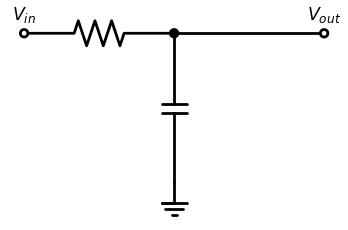

In [2]:
with schemdraw.Drawing() as d:
    elm.Dot(label='$V_{in}$',open=True)
    R1 = elm.Resistor().dot()
    elm.Capacitor().down()
    elm.Ground()
    elm.Line().right().at(R1.end)
    elm.Dot(open=True,label='$V_{out}$')



## Worksheet 15-c

### Find the voltage across each component

In [4]:
L1 = 1*si.m
C1 = 5*si.u
C2 = 1*si.u
R2 = 2*si.k
f = 2*si.k

Xl1 = get_inductive_reactance(L1,f)
Xc1 = get_capacitive_reactance(C1,f)
Xc2 = get_capacitive_reactance(C2,f)

print(Xl1)
print(Xc1)
print(Xc2)

12.566370614359172j
-15.915494309189537j
-79.57747154594767j


In [6]:
# L1 + (C1||(R2+C2))

Ztotal = Xl1+recipsumrecip([Xc1,sum([R2,Xc2])])
Ztotal

(0.12636340553202666-3.3430902866454577j)

In [7]:
polar_format(Ztotal)

(3.34547760042133, -87.8353427101138)

In [8]:
voltage_in = 15

current_total = voltage_in/Ztotal
current_total

(0.16935433895026417+4.480465235660305j)

In [10]:
Vl1 = current_total * Xl1
polar_format(Vl1)   

(56.34339300064314, 177.8353427101138)

In [12]:
voltage_off_l1 = voltage_in-Vl1
Vc1 = voltage_off_l1
polar_format(Vc1)

(71.3349390909301, -1.7095860826523859)

In [18]:
Z_branch1 = R2+Xc2

Vr2 = voltage_off_l1*(R2/Z_branch1)
polar_format(Vr2)

(71.27853932641943, 0.5689386459696103)

In [17]:
Vc2 = voltage_off_l1*(Xc2/Z_branch1)
polar_format(Vc2)

(2.836082967542428, -89.4310613540304)